## Using wearable devices along with machine and deep learning techniques to enhance a person's health and wellbeing

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from time import time

# Data Preparation

In [3]:
dataset1 = pd.read_csv("Activity_Measurements\GOTOV02\GOTOV02-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset1 = dataset1.astype({"labels": str}, errors='raise')
dataset1 = dataset1[dataset1.labels != "nan"]
dataset1

,Unnamed: 0,time,x,y,z,labels
6985,12129,1.449045e+12,-0.1969,0.9021,-0.4356,syncJumping
6986,12130,1.449045e+12,-0.2046,0.9060,-0.4317,syncJumping
6987,12131,1.449045e+12,-0.2008,0.9021,-0.4317,syncJumping
6988,12132,1.449045e+12,-0.1969,0.8982,-0.4356,syncJumping
6989,12133,1.449045e+12,-0.1969,0.9060,-0.4278,syncJumping
...,...,...,...,...,...,...
458696,463840,1.449050e+12,-0.6326,0.3780,-0.9478,cycling
458697,463841,1.449050e+12,-0.6442,0.2344,-0.5646,cycling
458698,463842,1.449050e+12,-0.6018,0.2189,-0.6272,cycling
458699,463843,1.449050e+12,-0.4475,0.3741,-0.3457,cycling


In [4]:
dataset2 = pd.read_csv("Activity_Measurements\GOTOV03\GOTOV03-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset2 = dataset2.astype({"labels": str}, errors='raise')
dataset2 = dataset2[dataset2.labels != "nan"]
dataset2

,Unnamed: 0,time,x,y,z,labels
18943,18944,1.449149e+12,0.6017,-0.8448,0.1387,syncJumping
18944,18945,1.449149e+12,0.3674,-0.6320,-0.0076,syncJumping
18945,18946,1.449149e+12,0.1800,-0.4270,-0.2016,syncJumping
18946,18947,1.449149e+12,-0.0971,-0.2993,-0.1581,syncJumping
18947,18948,1.449149e+12,-0.4134,-0.2336,-0.1383,syncJumping
...,...,...,...,...,...,...
495853,495854,1.449154e+12,-0.6594,0.4356,-0.6846,cycling
495854,495855,1.449154e+12,-0.5579,0.5323,-0.6925,cycling
495855,495856,1.449154e+12,-0.4290,0.4898,-0.5144,cycling
495856,495857,1.449154e+12,-0.5188,0.4936,-0.6688,cycling


In [5]:
dataset3 = pd.read_csv("Activity_Measurements\GOTOV04\GOTOV04-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset3 = dataset3.astype({"labels": str}, errors='raise')
dataset3 = dataset3[dataset3.labels != "nan"]
dataset3

,Unnamed: 0,time,x,y,z,labels
7115,48087,1.449219e+12,-0.2221,0.8882,-0.1145,syncJumping
7116,48088,1.449219e+12,-0.2572,0.8805,-0.1541,syncJumping
7117,48089,1.449219e+12,-0.2611,0.8573,-0.1343,syncJumping
7118,48090,1.449219e+12,-0.2650,0.8573,-0.1264,syncJumping
7119,48091,1.449219e+12,-0.2846,0.8573,-0.1066,syncJumping
...,...,...,...,...,...,...
436368,477340,1.449224e+12,-0.6828,0.6561,0.1823,cycling
436369,477341,1.449224e+12,-0.7219,0.6561,0.1863,cycling
436370,477342,1.449224e+12,-0.7375,0.6716,0.1704,cycling
436371,477343,1.449224e+12,-0.7023,0.6755,0.1625,cycling


In [6]:
dataset4 = pd.read_csv("Activity_Measurements\GOTOV05\GOTOV05-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset4 = dataset4.astype({"labels": str}, errors='raise')
dataset4 = dataset4[dataset4.labels != "nan"]
dataset4

,Unnamed: 0,time,x,y,z,labels
1629,80101,1.454935e+12,-0.2663,0.9371,-0.1776,syncJumping
1630,80102,1.454935e+12,-0.2663,0.9487,-0.1619,syncJumping
1631,80103,1.454935e+12,-0.2663,0.9526,-0.1697,syncJumping
1632,80104,1.454935e+12,-0.2470,0.9526,-0.1424,syncJumping
1633,80105,1.454935e+12,-0.2393,0.9565,-0.1541,syncJumping
...,...,...,...,...,...,...
393339,471811,1.454940e+12,-0.0928,0.7740,-0.2675,walkingFast
393340,471812,1.454940e+12,-0.0851,0.9293,-0.2206,walkingFast
393341,471813,1.454940e+12,-0.0928,1.0225,-0.1580,walkingFast
393342,471814,1.454940e+12,-0.0889,0.9642,-0.1228,walkingFast


In [7]:
dataset5 = pd.read_csv("Activity_Measurements\GOTOV06\GOTOV06-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset5 = dataset5.astype({"labels": str}, errors='raise')
dataset5 = dataset5[dataset5.labels != "nan"]
dataset5

,Unnamed: 0,time,x,y,z,labels
7972,96387,1.455011e+12,-1.7393,1.5000,-0.8383,syncJumping
7973,96388,1.455011e+12,-1.6467,1.4262,-0.7875,syncJumping
7974,96389,1.455011e+12,-1.5002,1.3447,-0.7562,syncJumping
7975,96390,1.455011e+12,-1.3576,1.2632,-0.7249,syncJumping
7976,96391,1.455011e+12,-1.2843,1.1661,-0.7171,syncJumping
...,...,...,...,...,...,...
419053,507468,1.455016e+12,-0.4900,0.8594,-0.2088,walkingFast
419054,507469,1.455016e+12,-0.4900,0.8672,-0.2128,walkingFast
419055,507470,1.455016e+12,-0.4900,0.8594,-0.2049,walkingFast
419056,507471,1.455016e+12,-0.4784,0.8478,-0.1815,walkingFast


In [8]:
dataset6 = pd.read_csv("Activity_Measurements\GOTOV07\GOTOV07-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset6 = dataset6.astype({"labels": str}, errors='raise')
dataset6 = dataset6[dataset6.labels != "nan"]
dataset6

,Unnamed: 0,time,x,y,z,labels
5057,77958,1.455097e+12,-0.3550,0.9332,-0.1033,syncJumping
5058,77959,1.455097e+12,-0.3511,0.9487,-0.0876,syncJumping
5059,77960,1.455097e+12,-0.3434,0.9409,-0.0916,syncJumping
5060,77961,1.455097e+12,-0.3357,0.9332,-0.0798,syncJumping
5061,77962,1.455097e+12,-0.3396,0.9332,-0.0798,syncJumping
...,...,...,...,...,...,...
550196,623097,1.455103e+12,-0.6056,0.4596,-0.8852,cycling
550197,623098,1.455103e+12,-0.5941,0.3897,-0.8109,cycling
550198,623099,1.455103e+12,-0.5092,0.4324,-0.8500,cycling
550199,623100,1.455103e+12,-0.5131,0.4712,-0.8969,cycling


In [9]:
dataset7 = pd.read_csv("Activity_Measurements\GOTOV08\GOTOV08-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset7 = dataset7.astype({"labels": str}, errors='raise')
dataset7 = dataset7[dataset7.labels != "nan"]
dataset7

,Unnamed: 0,time,x,y,z,labels
4972,67544,1.455183e+12,-0.4128,0.9099,0.0295,syncJumping
4973,67545,1.455183e+12,-0.4051,0.9176,0.0413,syncJumping
4974,67546,1.455183e+12,-0.4051,0.9138,0.0139,syncJumping
4975,67547,1.455183e+12,-0.4090,0.9215,0.0295,syncJumping
4976,67548,1.455183e+12,-0.4090,0.9254,0.0335,syncJumping
...,...,...,...,...,...,...
555253,617825,1.455190e+12,-1.1069,0.1451,0.1390,cycling
555254,617826,1.455190e+12,-1.0529,0.1606,0.0061,cycling
555255,617827,1.455190e+12,-1.0144,0.1451,-0.0564,cycling
555256,617828,1.455190e+12,-1.0645,0.2033,-0.1267,cycling


In [10]:
dataset8 = pd.read_csv("Activity_Measurements\GOTOV09\GOTOV09-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset8 = dataset8.astype({"labels": str}, errors='raise')
dataset8 = dataset8[dataset8.labels != "nan"]
dataset8

,Unnamed: 0,time,x,y,z,labels
5486,68401,1455273127000,-0.2008,1.0069,-0.2870,syncJumping
5487,68402,1455273127011,-0.2046,0.9836,-0.2870,syncJumping
5488,68403,1455273127023,-0.2625,0.9759,-0.3144,syncJumping
5489,68404,1455273127035,-0.2509,0.9642,-0.3027,syncJumping
5490,68405,1455273127046,-0.2239,0.9409,-0.2949,syncJumping
...,...,...,...,...,...,...
403025,465940,1455277764955,-0.4784,1.2321,-0.3770,walkingFast
403026,465941,1455277764967,-0.5015,1.0691,-0.4473,walkingFast
403027,465942,1455277764978,-0.4823,0.9953,-0.4864,walkingFast
403028,465943,1455277764990,-0.4206,0.9875,-0.5021,walkingFast


In [11]:
dataset9 = pd.read_csv("Activity_Measurements\GOTOV10\GOTOV10-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset9 = dataset9.astype({"labels": str}, errors='raise')
dataset9 = dataset9[dataset9.labels != "nan"]
dataset9

,Unnamed: 0,time,x,y,z,labels
4714,77872,1.455702e+12,-0.0774,0.0053,-0.0642,syncJumping
4715,77873,1.455702e+12,-0.0658,0.0403,-0.0876,syncJumping
4716,77874,1.455702e+12,-0.0812,0.1024,-0.0994,syncJumping
4717,77875,1.455702e+12,-0.0658,0.1373,-0.0876,syncJumping
4718,77876,1.455702e+12,-0.1082,0.2111,-0.0525,syncJumping
...,...,...,...,...,...,...
549853,623011,1.455708e+12,-0.9103,0.9448,-0.1033,cycling
549854,623012,1.455708e+12,0.0845,1.5427,-0.7875,cycling
549855,623013,1.455708e+12,-0.4051,0.3936,-1.4756,cycling
549856,623014,1.455708e+12,-1.2380,-0.2663,-1.1511,cycling


In [12]:
dataset10 = pd.read_csv("Activity_Measurements\GOTOV11\GOTOV11-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset10 = dataset10.astype({"labels": str}, errors='raise')
dataset10 = dataset10[dataset10.labels != "nan"]
dataset10

,Unnamed: 0,time,x,y,z,labels
12772,80444,1.455788e+12,-0.2740,0.9642,-0.1541,syncJumping
12773,80445,1.455788e+12,-0.2702,0.9526,-0.1737,syncJumping
12774,80446,1.455788e+12,-0.2856,0.9720,-0.1737,syncJumping
12775,80447,1.455788e+12,-0.2817,0.9604,-0.1463,syncJumping
12776,80448,1.455788e+12,-0.2856,0.9642,-0.1385,syncJumping
...,...,...,...,...,...,...
515911,583583,1.455794e+12,-0.7792,0.6731,-0.6819,cycling
515912,583584,1.455794e+12,-0.6982,0.8284,-0.5763,cycling
515913,583585,1.455794e+12,-0.1969,0.4984,-0.3379,cycling
515914,583586,1.455794e+12,-0.4437,0.4906,-0.3965,cycling


In [13]:
dataset11 = pd.read_csv("Activity_Measurements\GOTOV12\GOTOV12-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset11 = dataset11.astype({"labels": str}, errors='raise')
dataset11 = dataset11[dataset11.labels != "nan"]
dataset11

,Unnamed: 0,time,x,y,z,labels
5057,65101,1.455878e+12,-0.3627,0.9448,-0.1150,syncJumping
5058,65102,1.455878e+12,-0.3589,0.9409,-0.0955,syncJumping
5059,65103,1.455878e+12,-0.3704,0.9448,-0.1072,syncJumping
5060,65104,1.455878e+12,-0.3550,0.9293,-0.1033,syncJumping
5061,65105,1.455878e+12,-0.3589,0.9371,-0.1033,syncJumping
...,...,...,...,...,...,...
475624,535668,1.455883e+12,-0.5632,0.7197,-0.5451,cycling
475625,535669,1.455883e+12,-0.7560,0.7235,-0.5099,cycling
475626,535670,1.455883e+12,-0.8640,0.7352,-0.5803,cycling
475627,535671,1.455883e+12,-0.7098,0.6032,-0.7093,cycling


In [14]:
dataset12 = pd.read_csv("Activity_Measurements\GOTOV13\GOTOV13-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset12 = dataset12.astype({"labels": str}, errors='raise')
dataset12 = dataset12[dataset12.labels != "nan"]
dataset12

,Unnamed: 0,time,x,y,z,labels
2057,72129,1.456137e+12,-0.2740,0.8206,-0.4669,syncJumping
2058,72130,1.456137e+12,-0.2779,0.8322,-0.5021,syncJumping
2059,72131,1.456137e+12,-0.2663,0.8206,-0.4747,syncJumping
2060,72132,1.456137e+12,-0.2702,0.8284,-0.4825,syncJumping
2061,72133,1.456137e+12,-0.2817,0.8361,-0.5021,syncJumping
...,...,...,...,...,...,...
240339,310411,1.456140e+12,-0.5902,0.8167,-0.3379,vacuumCleaning
240340,310412,1.456140e+12,-0.6172,0.8284,-0.2792,vacuumCleaning
240341,310413,1.456140e+12,-0.6481,0.8322,-0.2792,vacuumCleaning
240342,310414,1.456140e+12,-0.6519,0.8167,-0.1502,vacuumCleaning


In [15]:
dataset13 = pd.read_csv("Activity_Measurements\GOTOV14\GOTOV14-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset13 = dataset13.astype({"labels": str}, errors='raise')
dataset13 = dataset13[dataset13.labels != "nan"]
dataset13

,Unnamed: 0,time,x,y,z,labels
5486,65487,1.456220e+12,-0.1969,0.9604,-0.2909,syncJumping
5487,65488,1.456220e+12,-0.1776,0.9448,-0.2949,syncJumping
5488,65489,1.456220e+12,-0.1969,0.9565,-0.2909,syncJumping
5489,65490,1.456220e+12,-0.1931,0.9526,-0.3066,syncJumping
5490,65491,1.456220e+12,-0.1776,0.9604,-0.2870,syncJumping
...,...,...,...,...,...,...
241196,301197,1.456222e+12,-0.5671,1.2748,-0.0916,vacuumCleaning
241197,301198,1.456222e+12,-0.6943,1.1428,-0.1580,vacuumCleaning
241198,301199,1.456222e+12,-0.8177,0.9992,-0.0642,vacuumCleaning
241199,301200,1.456222e+12,-0.9180,0.9409,-0.0446,vacuumCleaning


In [16]:
dataset14 = pd.read_csv("Activity_Measurements\GOTOV15\GOTOV15-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset14 = dataset14.astype({"labels": str}, errors='raise')
dataset14 = dataset14[dataset14.labels != "nan"]
dataset14

,Unnamed: 0,time,x,y,z,labels
7543,61329,1.456306e+12,-0.2856,0.9604,-0.0955,syncJumping
7544,61330,1.456306e+12,-0.2933,0.9642,-0.1072,syncJumping
7545,61331,1.456306e+12,-0.2856,0.9642,-0.1072,syncJumping
7546,61332,1.456306e+12,-0.2895,0.9642,-0.0994,syncJumping
7547,61333,1.456306e+12,-0.2740,0.9642,-0.0994,syncJumping
...,...,...,...,...,...,...
178111,231897,1.456308e+12,-0.9411,0.6498,0.3345,dishwashing
178112,231898,1.456308e+12,-0.9257,0.6575,0.3149,dishwashing
178113,231899,1.456308e+12,-0.8948,0.6614,0.2954,dishwashing
178114,231900,1.456308e+12,-0.7984,0.6614,0.2485,dishwashing


In [17]:
dataset15 = pd.read_csv("Activity_Measurements\GOTOV16\GOTOV16-GENEActiv-wrist.csv", low_memory=False, index_col=False)
dataset15 = dataset15.astype({"labels": str}, errors='raise')
dataset15 = dataset15[dataset15.labels != "nan"]
dataset15

,Unnamed: 0,time,x,y,z,labels
7629,93515,1.456484e+12,-0.1738,0.9798,-0.1306,syncJumping
7630,93516,1.456484e+12,-0.1314,0.9875,-0.1893,syncJumping
7631,93517,1.456484e+12,-0.1159,0.9720,-0.2049,syncJumping
7632,93518,1.456484e+12,-0.1198,0.9992,-0.2714,syncJumping
7633,93519,1.456484e+12,-0.0735,1.0031,-0.2831,syncJumping
...,...,...,...,...,...,...
512054,597940,1.456490e+12,-0.3743,0.9293,-0.1502,cycling
512055,597941,1.456490e+12,-0.3743,0.9409,-0.1541,cycling
512056,597942,1.456490e+12,-0.3743,0.9254,-0.1346,cycling
512057,597943,1.456490e+12,-0.3627,0.9176,-0.1267,cycling


## Concatenation To Provide Final Dataset

In [18]:
frames = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6, dataset7,
         dataset8, dataset9, dataset10, dataset11, dataset12, dataset13, dataset14,
         dataset15]

dataset = pd.concat(frames)
dataset

,Unnamed: 0,time,x,y,z,labels
6985,12129,1.449045e+12,-0.1969,0.9021,-0.4356,syncJumping
6986,12130,1.449045e+12,-0.2046,0.9060,-0.4317,syncJumping
6987,12131,1.449045e+12,-0.2008,0.9021,-0.4317,syncJumping
6988,12132,1.449045e+12,-0.1969,0.8982,-0.4356,syncJumping
6989,12133,1.449045e+12,-0.1969,0.9060,-0.4278,syncJumping
...,...,...,...,...,...,...
512054,597940,1.456490e+12,-0.3743,0.9293,-0.1502,cycling
512055,597941,1.456490e+12,-0.3743,0.9409,-0.1541,cycling
512056,597942,1.456490e+12,-0.3743,0.9254,-0.1346,cycling
512057,597943,1.456490e+12,-0.3627,0.9176,-0.1267,cycling


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3540050 entries, 6985 to 512058
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   time        float64
 2   x           float64
 3   y           float64
 4   z           float64
 5   labels      object 
dtypes: float64(4), int64(1), object(1)
memory usage: 189.1+ MB


In [20]:
dataset['labels'].value_counts()

cycling            588524
walkingFast        311154
walkingNormal      306354
walkingSlow        305152
lyingDownLeft      234018
dishwashing        232303
sittingCouch       231444
lyingDownRight     224501
sittingSofa        222184
vacuumCleaning     221586
stakingShelves     217729
sittingChair       211727
standing           136139
step                48864
syncJumping         25899
walkingStairsUp     22472
Name: labels, dtype: int64

In [21]:
dataset.isnull().sum()

Unnamed: 0    0
time          0
x             0
y             0
z             0
labels        0
dtype: int64

# Plot the Data

In [22]:
Fs = 20
labels = dataset['labels'].value_counts().index
labels

Index(['cycling', 'walkingFast', 'walkingNormal', 'walkingSlow',
       'lyingDownLeft', 'dishwashing', 'sittingCouch', 'lyingDownRight',
       'sittingSofa', 'vacuumCleaning', 'stakingShelves', 'sittingChair',
       'standing', 'step', 'syncJumping', 'walkingStairsUp'],
      dtype='object')

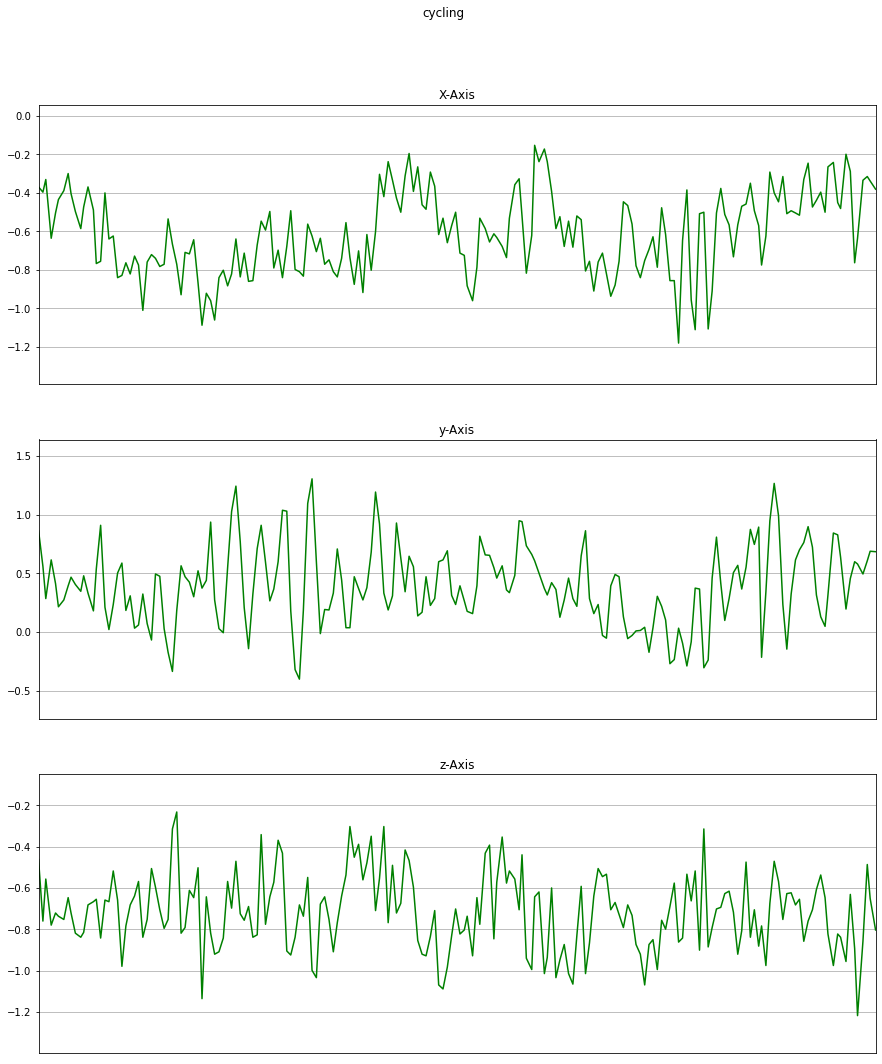

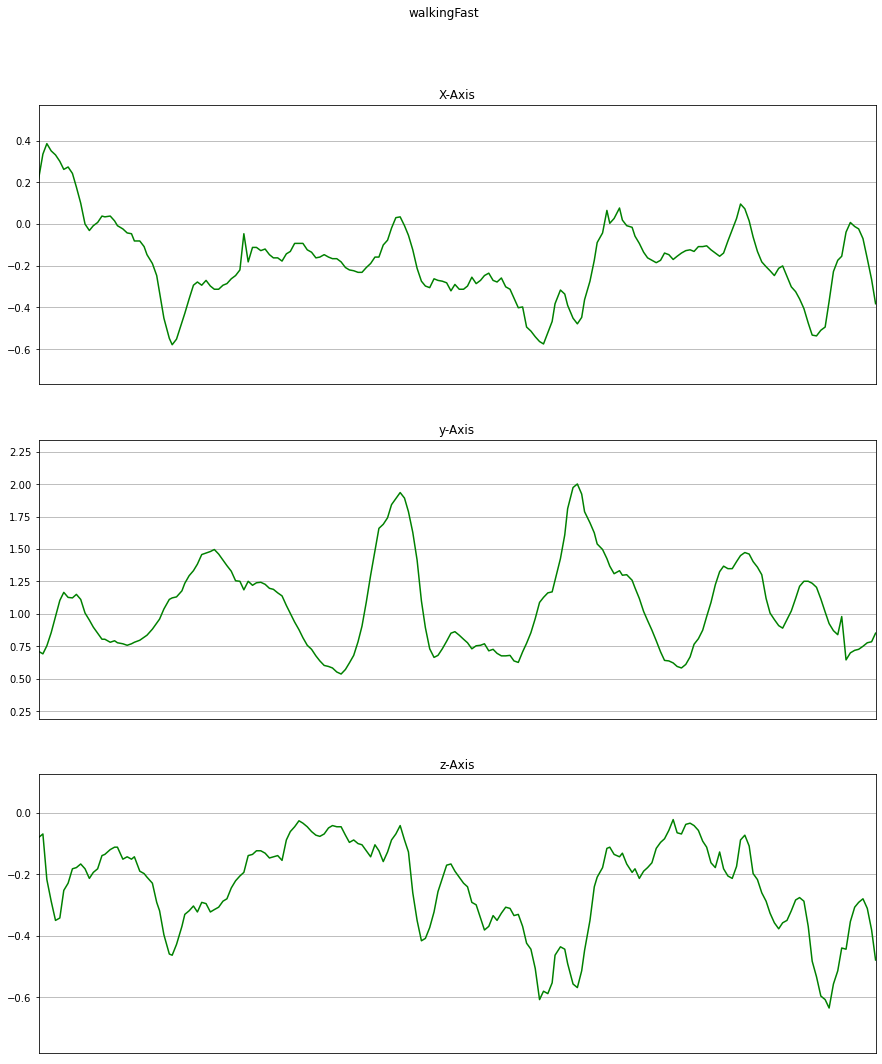

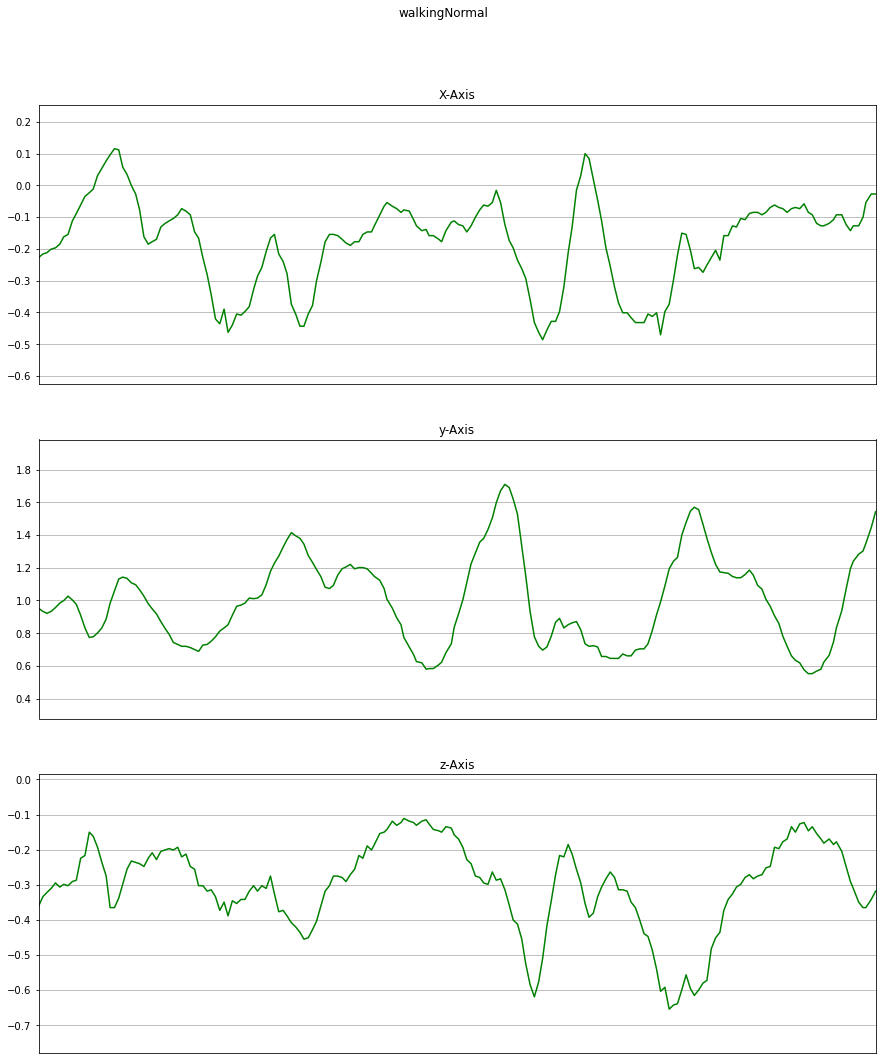

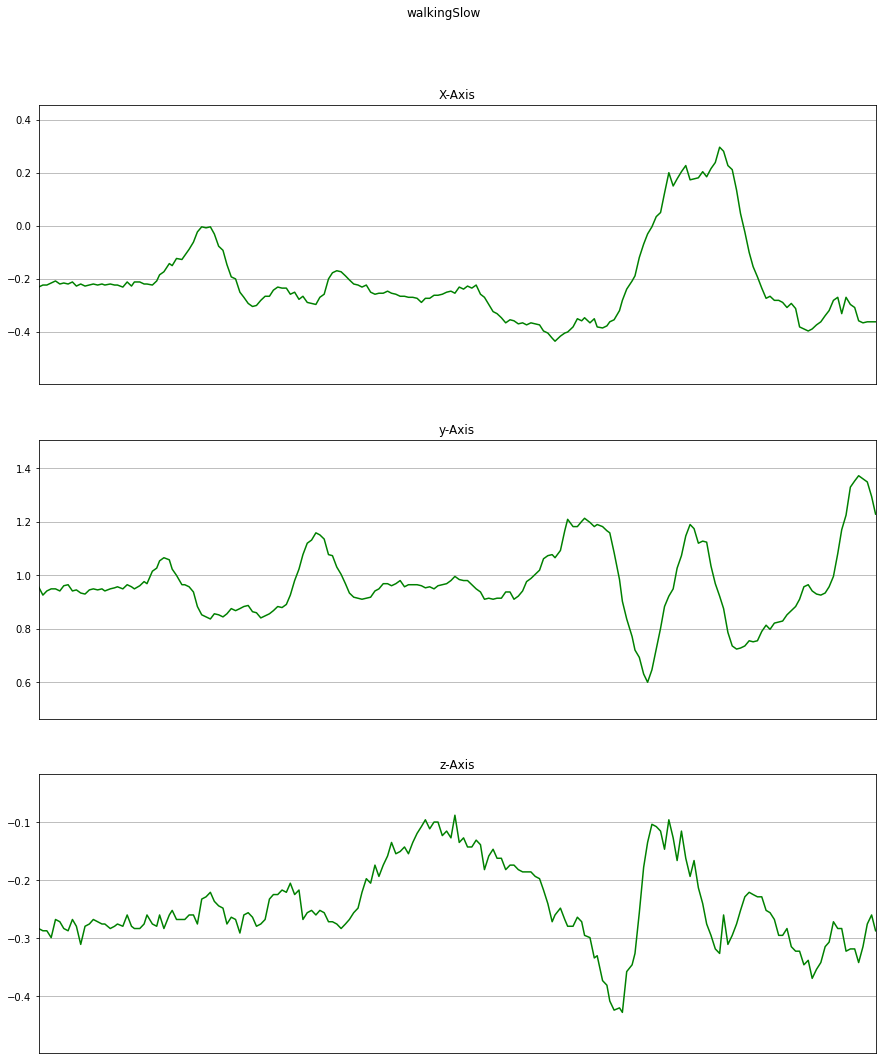

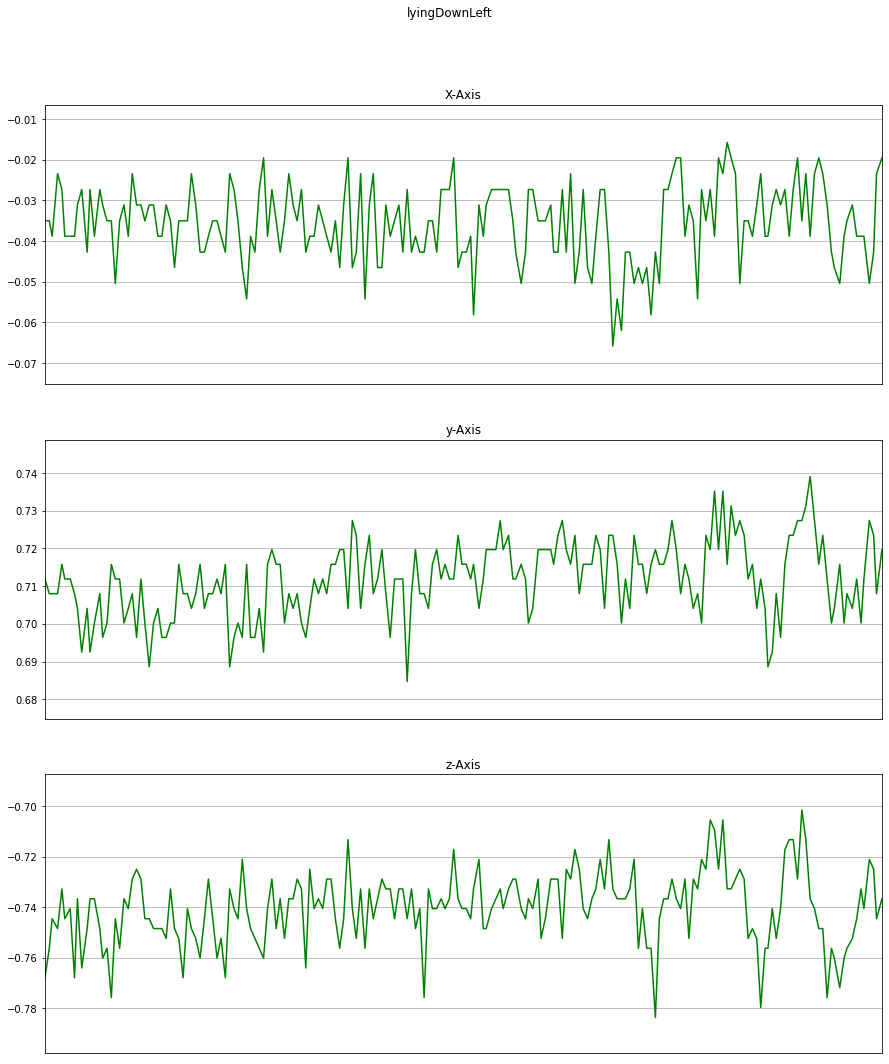

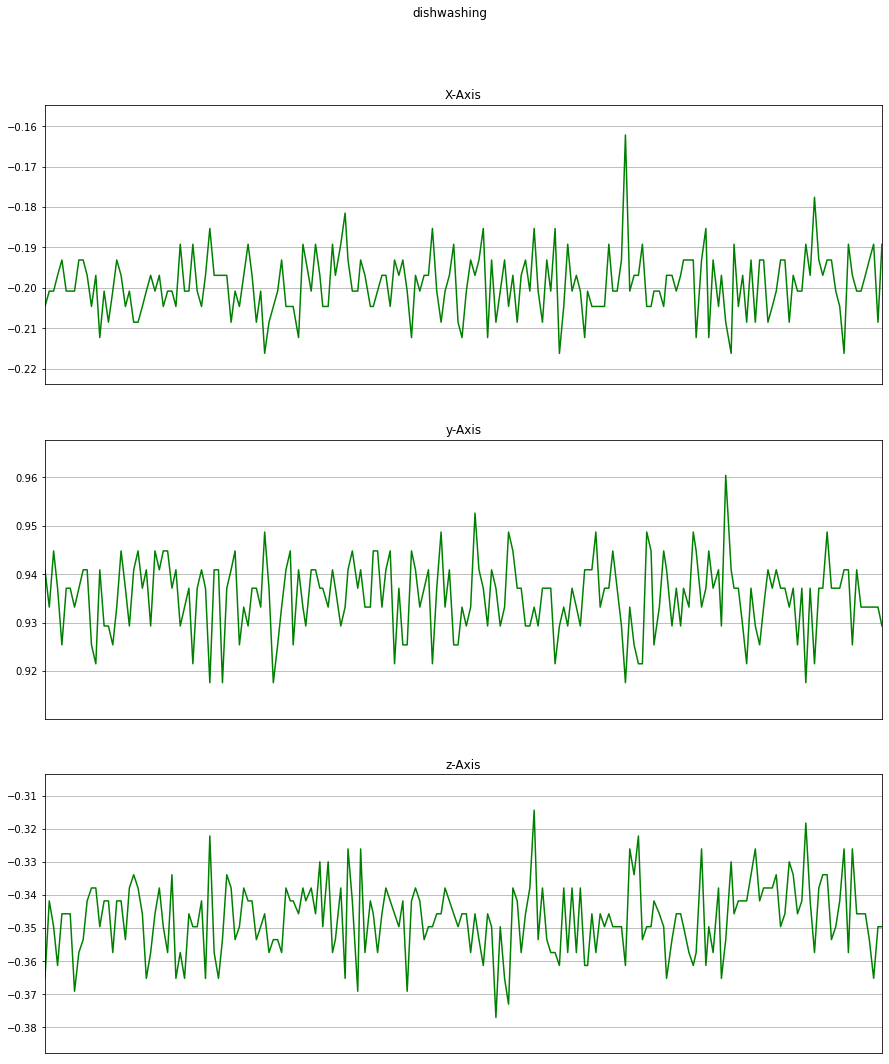

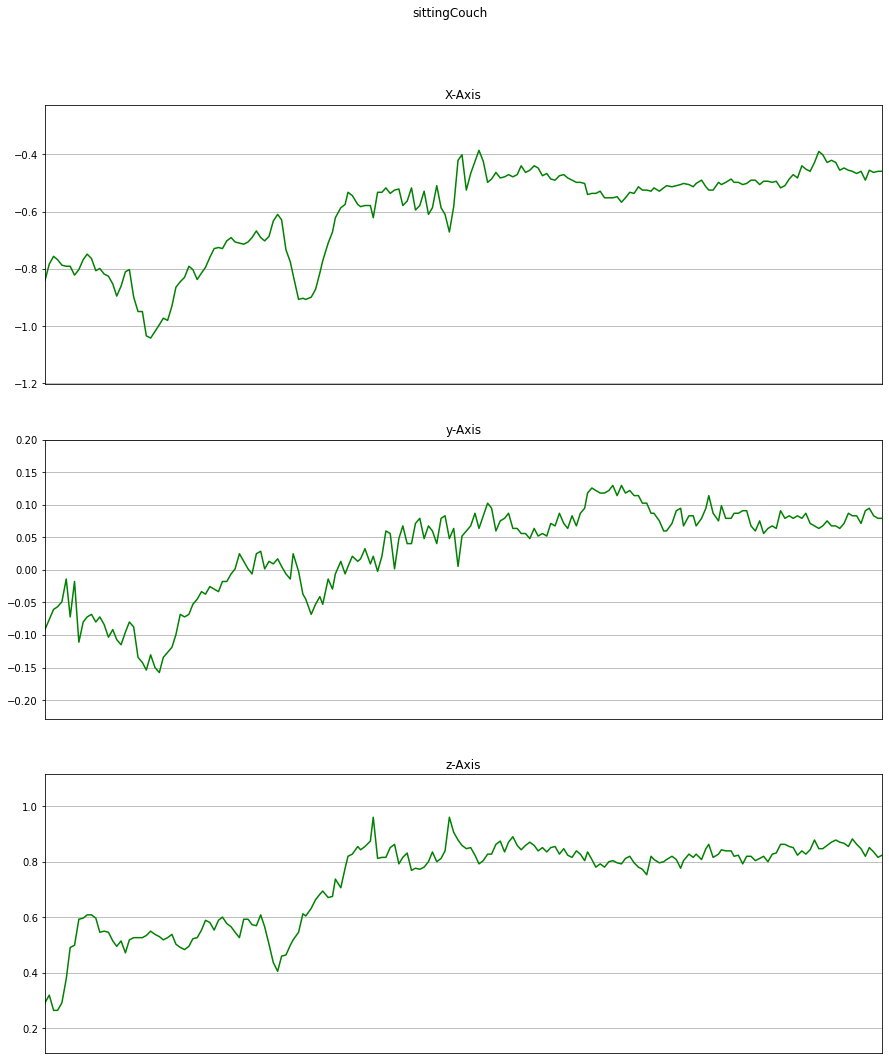

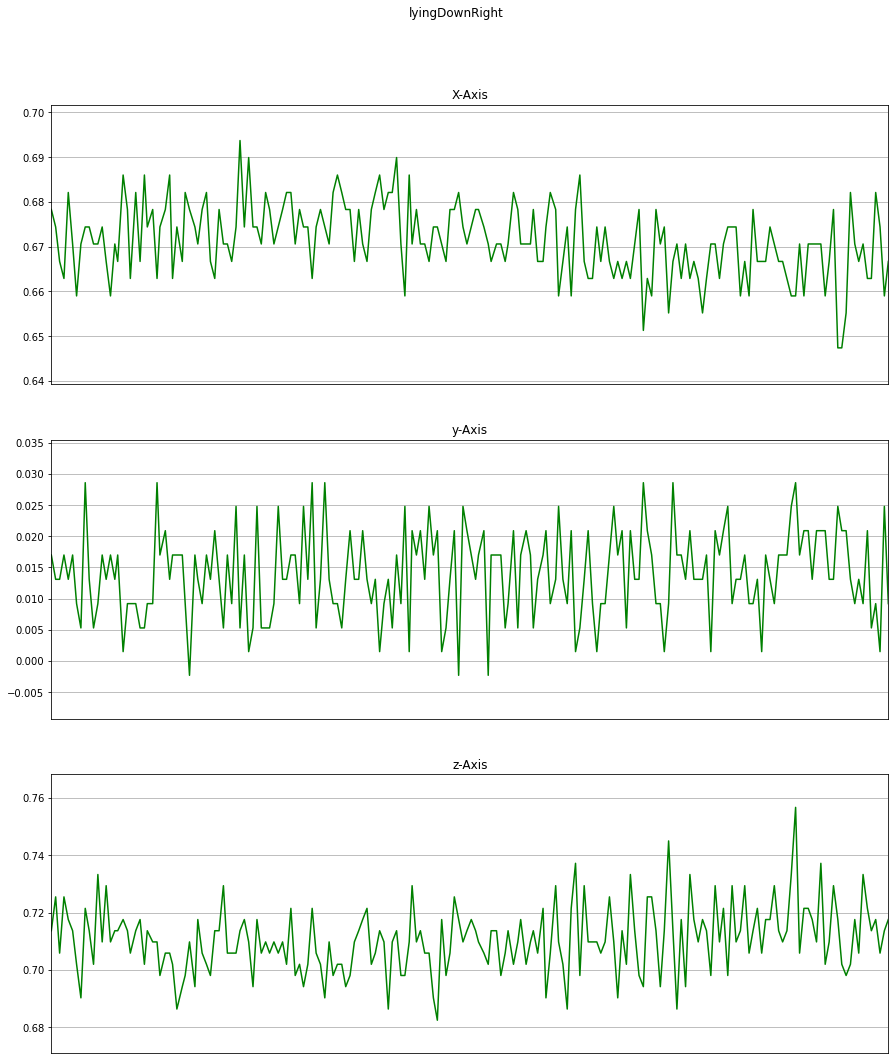

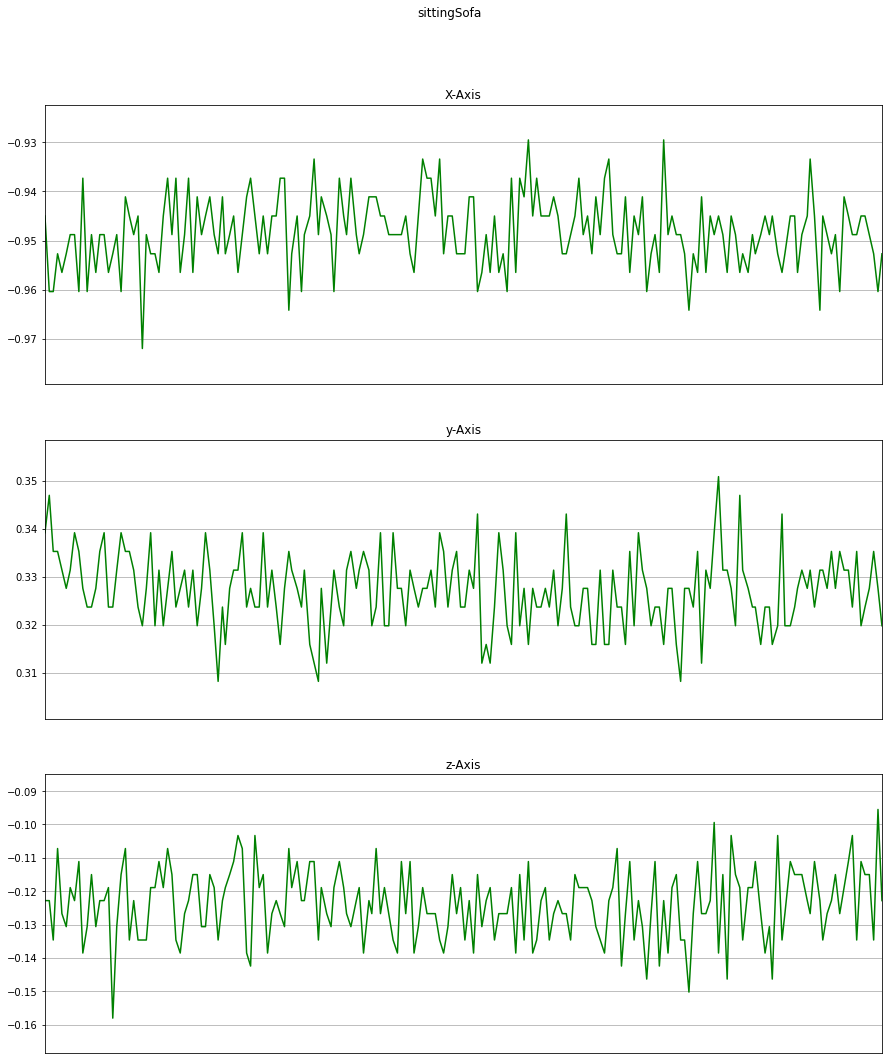

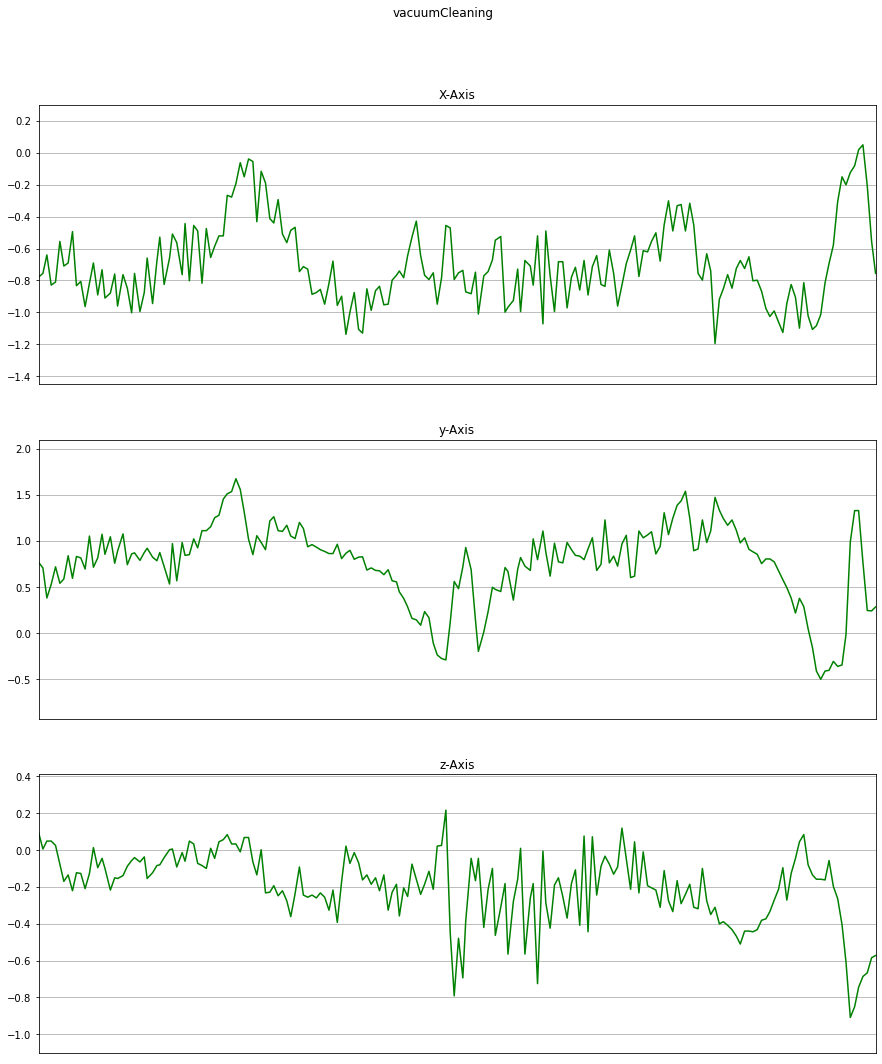

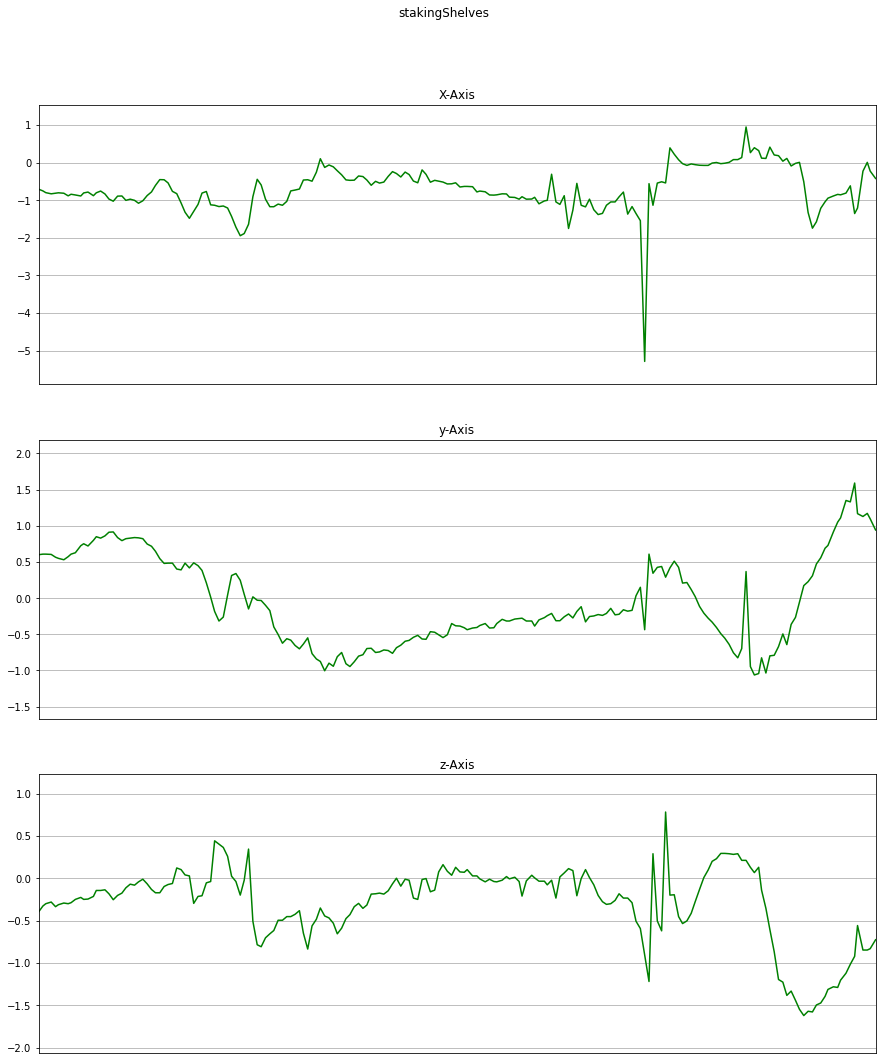

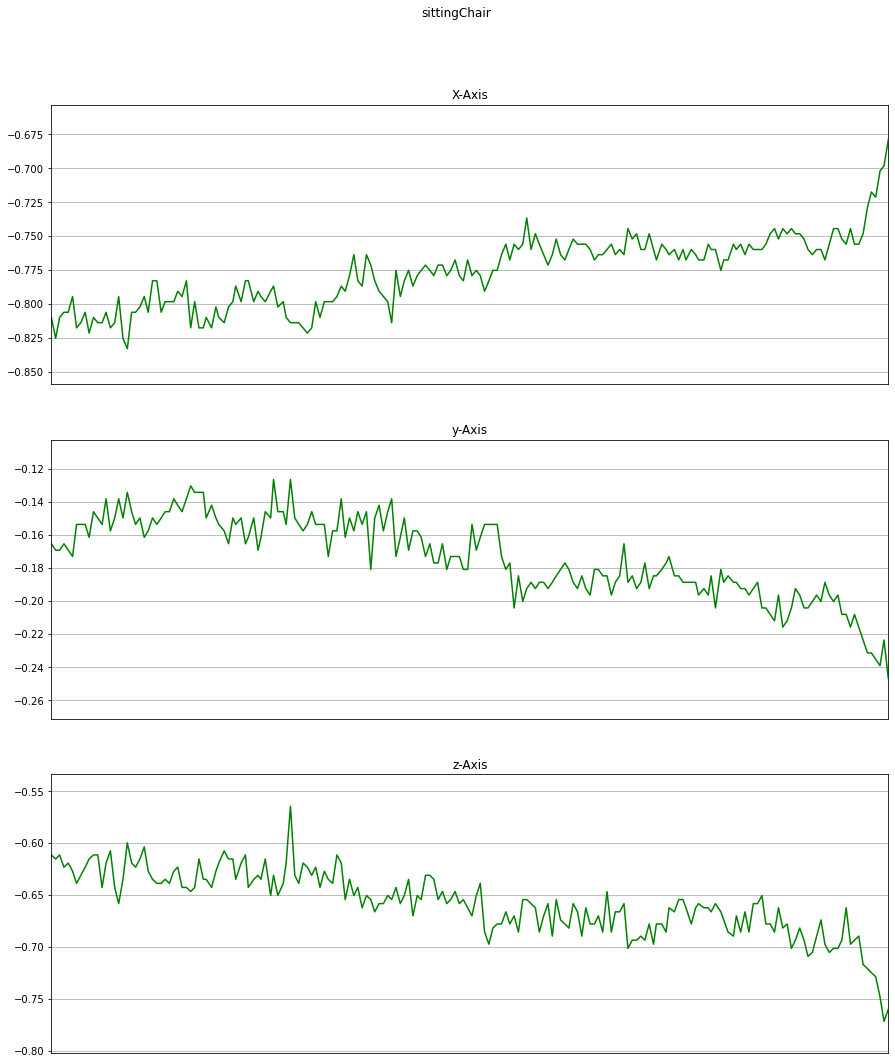

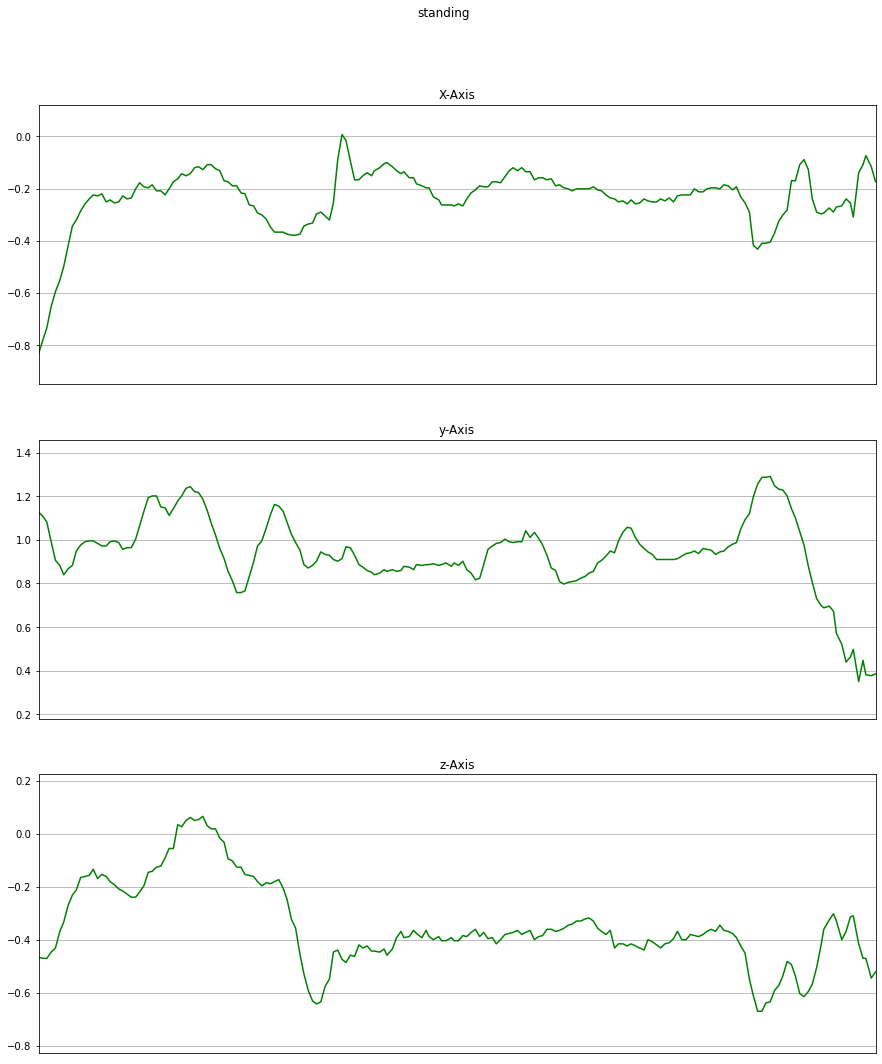

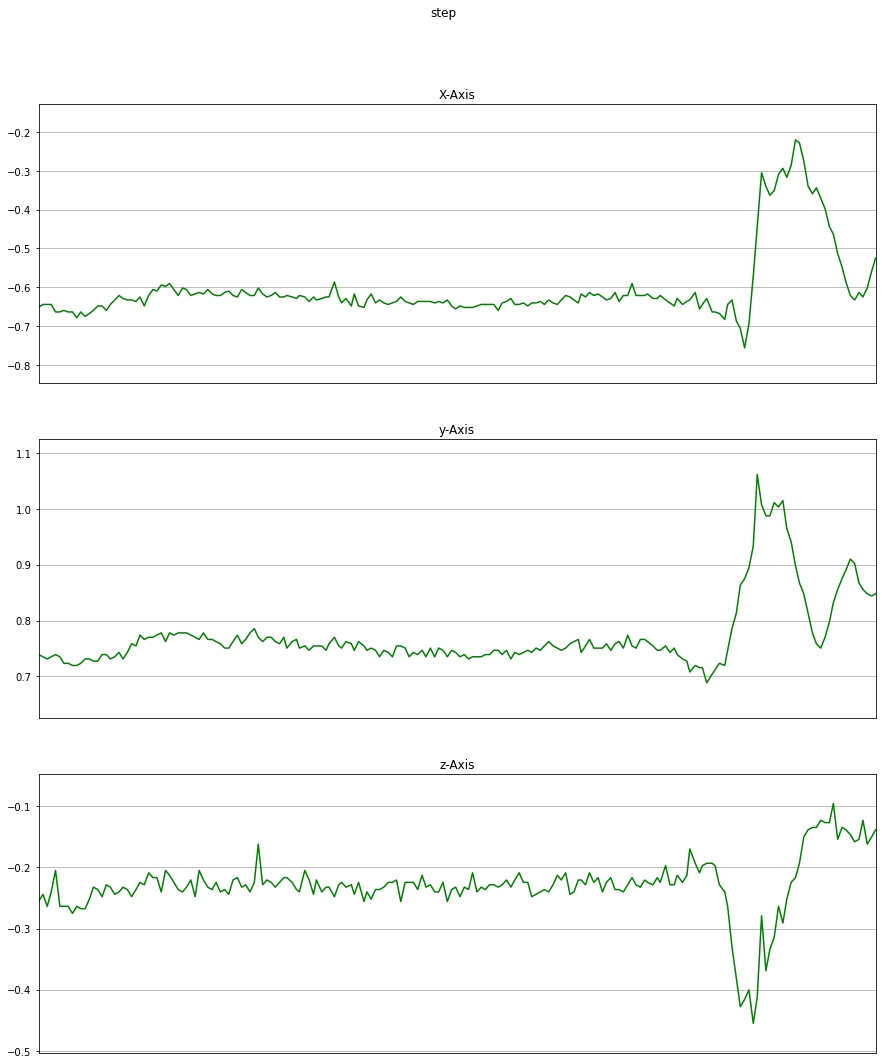

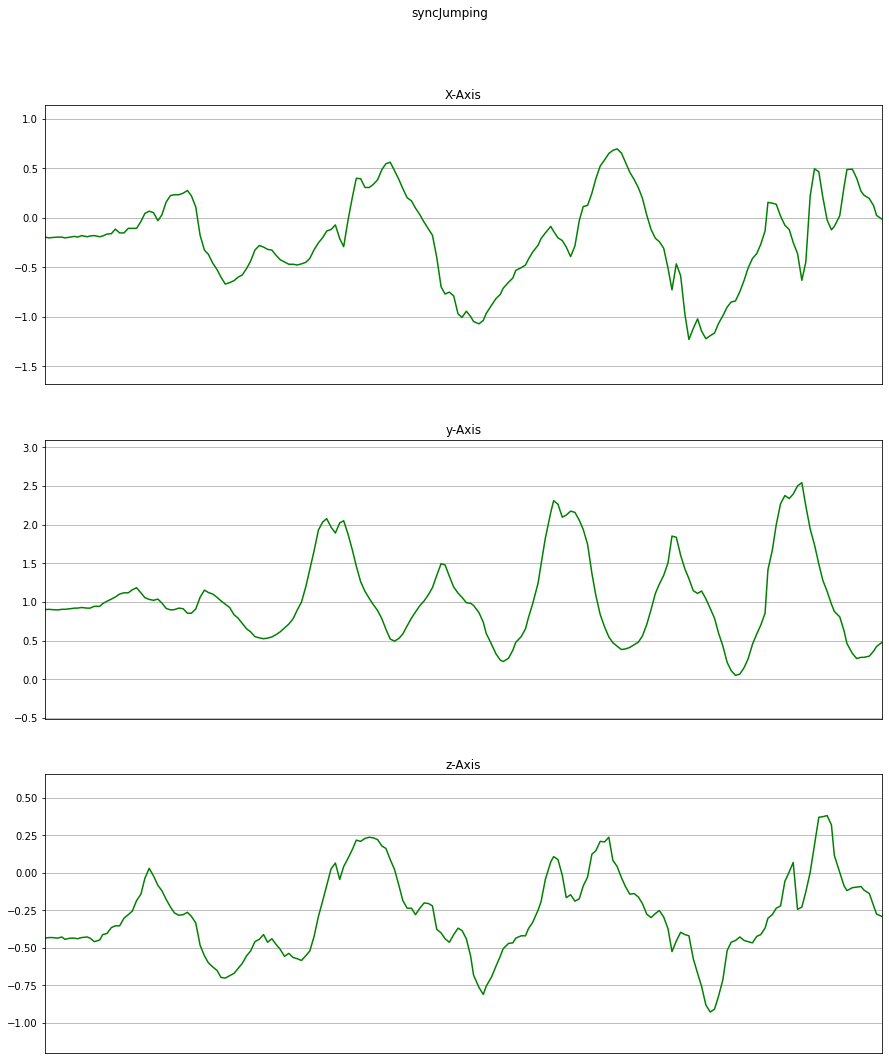

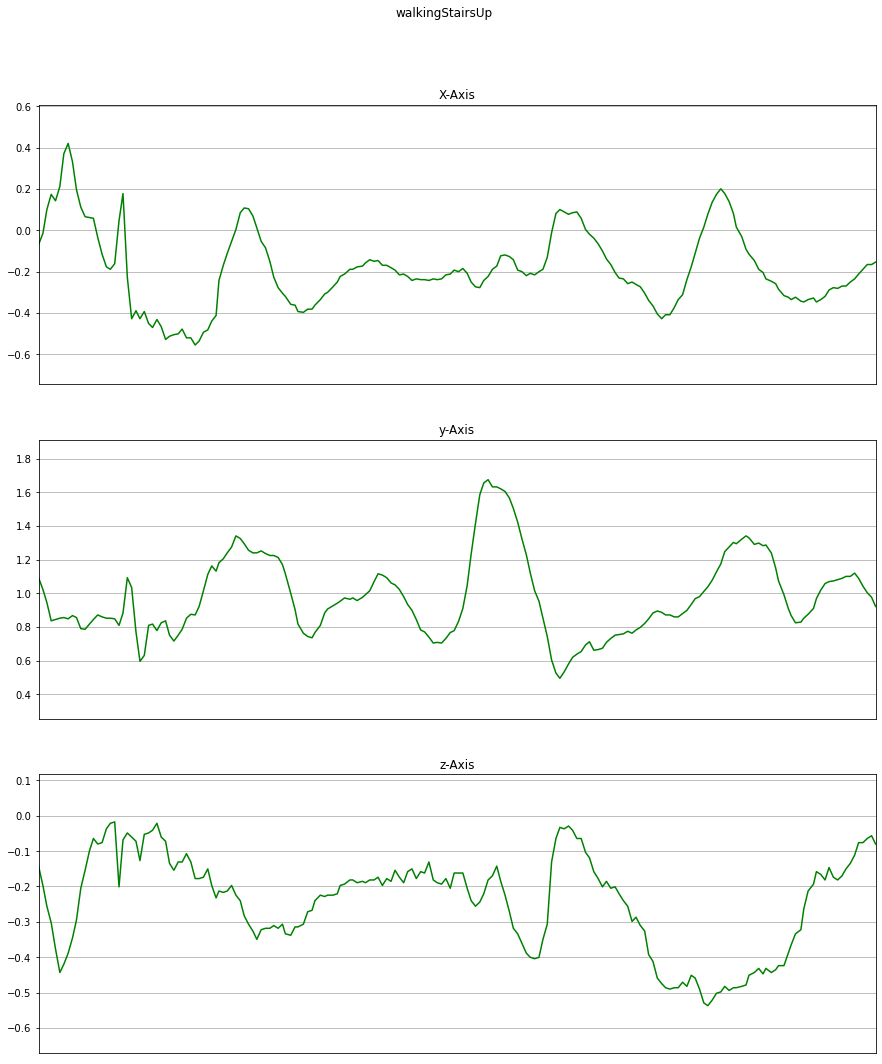

In [23]:
def plot_label(label, result):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize=(15, 17), sharex=True)
    plot_axis(ax0, result['time'], result['x'], 'X-Axis')
    plot_axis(ax1, result['time'], result['y'], 'y-Axis')
    plot_axis(ax2, result['time'], result['z'], 'z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(label)
    plt.subplots_adjust(top=0.90)
    plt.show()
    
def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
for label in labels:
    data_for_plot = dataset[(dataset['labels'] == label)][:Fs*10]
    plot_label(label, data_for_plot)

In [24]:
df = dataset.drop(['time', 'Unnamed: 0'], axis=1).copy()
df.head()

,x,y,z,labels
6985,-0.1969,0.9021,-0.4356,syncJumping
6986,-0.2046,0.9060,-0.4317,syncJumping
6987,-0.2008,0.9021,-0.4317,syncJumping
6988,-0.1969,0.8982,-0.4356,syncJumping
6989,-0.1969,0.9060,-0.4278,syncJumping


In [25]:
df.shape
df['labels'].value_counts()

cycling            588524
walkingFast        311154
walkingNormal      306354
walkingSlow        305152
lyingDownLeft      234018
dishwashing        232303
sittingCouch       231444
lyingDownRight     224501
sittingSofa        222184
vacuumCleaning     221586
stakingShelves     217729
sittingChair       211727
standing           136139
step                48864
syncJumping         25899
walkingStairsUp     22472
Name: labels, dtype: int64

In [26]:
label = LabelEncoder()
df['label'] = label.fit_transform(df['labels'])
df.head()

,x,y,z,labels,label
6985,-0.1969,0.9021,-0.4356,syncJumping,10
6986,-0.2046,0.9060,-0.4317,syncJumping,10
6987,-0.2008,0.9021,-0.4317,syncJumping,10
6988,-0.1969,0.8982,-0.4356,syncJumping,10
6989,-0.1969,0.9060,-0.4278,syncJumping,10


In [27]:
label.classes_

array(['cycling', 'dishwashing', 'lyingDownLeft', 'lyingDownRight',
       'sittingChair', 'sittingCouch', 'sittingSofa', 'stakingShelves',
       'standing', 'step', 'syncJumping', 'vacuumCleaning', 'walkingFast',
       'walkingNormal', 'walkingSlow', 'walkingStairsUp'], dtype=object)

In [28]:
df

,x,y,z,labels,label
6985,-0.1969,0.9021,-0.4356,syncJumping,10
6986,-0.2046,0.9060,-0.4317,syncJumping,10
6987,-0.2008,0.9021,-0.4317,syncJumping,10
6988,-0.1969,0.8982,-0.4356,syncJumping,10
6989,-0.1969,0.9060,-0.4278,syncJumping,10
...,...,...,...,...,...
512054,-0.3743,0.9293,-0.1502,cycling,0
512055,-0.3743,0.9409,-0.1541,cycling,0
512056,-0.3743,0.9254,-0.1346,cycling,0
512057,-0.3627,0.9176,-0.1267,cycling,0


In [29]:
x = df[['x', 'y', 'z']]
y = df['label']

In [30]:
scaled_X = pd.DataFrame(data = x, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
6985,-0.1969,0.9021,-0.4356,10
6986,-0.2046,0.9060,-0.4317,10
6987,-0.2008,0.9021,-0.4317,10
6988,-0.1969,0.8982,-0.4356,10
6989,-0.1969,0.9060,-0.4278,10
...,...,...,...,...
512054,-0.3743,0.9293,-0.1502,0
512055,-0.3743,0.9409,-0.1541,0
512056,-0.3743,0.9254,-0.1346,0
512057,-0.3627,0.9176,-0.1267,0


In [31]:
scaled_X.reset_index(inplace=True)
scaled_X

,index,x,y,z,label
0,6985,-0.1969,0.9021,-0.4356,10
1,6986,-0.2046,0.9060,-0.4317,10
2,6987,-0.2008,0.9021,-0.4317,10
3,6988,-0.1969,0.8982,-0.4356,10
4,6989,-0.1969,0.9060,-0.4278,10
...,...,...,...,...,...
3540045,512054,-0.3743,0.9293,-0.1502,0
3540046,512055,-0.3743,0.9409,-0.1541,0
3540047,512056,-0.3743,0.9254,-0.1346,0
3540048,512057,-0.3627,0.9176,-0.1267,0


# Creating the Frame

In [32]:
import scipy.stats as stats

In [33]:
Fs = 20
frame_size = Fs*12 
overlap = Fs*6 

In [34]:
def Prepare_Frames(data, frame_size, overlap):
    frames = []
    labels = []
    
    for i in range(0, len(data) - frame_size, overlap):
        x = data['x'].values[i: i + frame_size]
        y = data['y'].values[i: i + frame_size]
        z = data['z'].values[i: i + frame_size]
        
        label = stats.mode(data['label'][i: i + frame_size])[0][0]
        
        frames.append([x, y, z])
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, 3)
    labels = np.asarray(labels)
    
    return frames, labels

In [35]:
X, Y = Prepare_Frames(scaled_X, frame_size, overlap)

In [36]:
X.shape, Y.shape

((29499, 240, 3), (29499,))

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [38]:
X_train.shape, X_test.shape

((23599, 240, 3), (5900, 240, 3))

In [39]:
X_train[0].shape, X_test[0].shape

((240, 3), (240, 3))

In [40]:
X_train = X_train.reshape(23599, 240, 3, 1)
X_test = X_test.reshape(5900, 240, 3, 1)

In [41]:
X_train[0].shape, X_test[0].shape

((240, 3, 1), (240, 3, 1))

# Building the CNN Model

In [42]:
from tensorflow.keras.layers import MaxPooling2D

CNN_model = Sequential()

CNN_model.add(Conv2D(16, (2, 2), activation='relu', input_shape= X_train[0].shape)) 
CNN_model.add(Dropout(0.1))
CNN_model.add(Conv2D(32, (2, 2), activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(16, activation='softmax'))


CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 239, 2, 16)        80        
                                                                 
 dropout (Dropout)           (None, 239, 2, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 238, 1, 32)        2080      
                                                                 
 dropout_1 (Dropout)         (None, 238, 1, 32)        0         
                                                                 
 flatten (Flatten)           (None, 7616)              0         
                                                                 
 dense (Dense)               (None, 64)                487488    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [43]:
from tensorflow.keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [44]:
CNN_model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', 
                  metrics=[f1, 'accuracy'])

In [45]:
CNN_history = CNN_model.fit(X_train, Y_train, epochs = 10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
738/738 [==============================] - 4s 5ms/step - loss: 1.3094 - f1: 4.7499 - accuracy: 0.5497 - val_loss: 0.8007 - val_f1: 2.8426 - val_accuracy: 0.7031
Epoch 2/10
738/738 [==============================] - 4s 5ms/step - loss: 0.9129 - f1: 3.3298 - accuracy: 0.6766 - val_loss: 0.6377 - val_f1: 2.4578 - val_accuracy: 0.7851
Epoch 3/10
738/738 [==============================] - 4s 5ms/step - loss: 0.7940 - f1: 2.8934 - accuracy: 0.7186 - val_loss: 0.5845 - val_f1: 2.3659 - val_accuracy: 0.8063
Epoch 4/10
738/738 [==============================] - 4s 5ms/step - loss: 0.7159 - f1: 2.6157 - accuracy: 0.7469 - val_loss: 0.5312 - val_f1: 2.0378 - val_accuracy: 0.8290
Epoch 5/10
738/738 [==============================] - 4s 5ms/step - loss: 0.6677 - f1: 2.4465 - accuracy: 0.7620 - val_loss: 0.5215 - val_f1: 1.9561 - val_accuracy: 0.8131
Epoch 6/10
738/738 [==============================] - 4s 5ms/step - loss: 0.6248 - f1: 2.3372 - accuracy: 0.7723 - val_loss: 0.4868 - val_f1

In [46]:
from sklearn.metrics import f1_score, accuracy_score

time0 = time()
y_pred = np.argmax(CNN_model.predict(X_test), axis=1)
y_test = Y_test.copy()
mean_f1 = f1_score(y_test, y_pred, average='macro')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print('mean-f1: {:.2f}, weighted-f1: {:.2f}, accuracy: {:.2f}, time: {:.3f} sec'.format(mean_f1, weighted_f1, accuracy,
                                                                                       time()-time0))

mean-f1: 0.75, weighted-f1: 0.84, accuracy: 0.85, time: 0.246 sec


# CNN Graphs

In [47]:
def learning_curve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model Learning Curve")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc ='upper right')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc = 'upper right')
    plt.show()

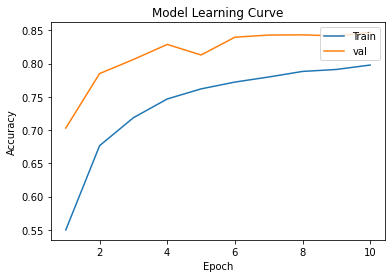

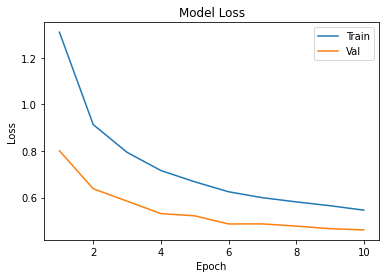

In [48]:
learning_curve(CNN_history, 10)

In [49]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

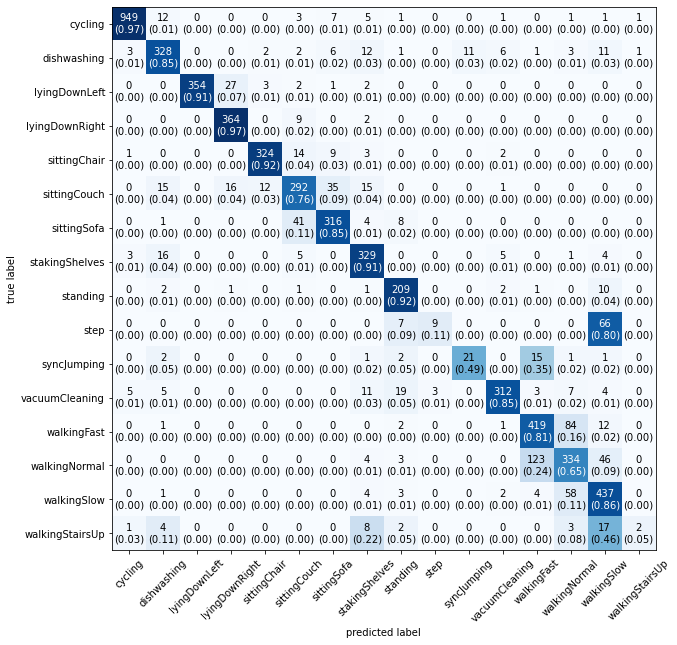

In [50]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(10,10))

# LSTM Model                  

In [51]:
X_train.shape

(23599, 240, 3, 1)

In [52]:
X_train = X_train.reshape(23599, 240, 3)
X_test = X_test.reshape(5900, 240, 3)

In [53]:
X_train[0].shape, X_test[0].shape, Y_train.shape

((240, 3), (240, 3), (23599,))

In [54]:
from tensorflow.keras.layers import LSTM

LSTM_model = Sequential()

LSTM_model.add(LSTM(64, input_shape=(X_train[0].shape), return_sequences=True))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(LSTM(64, return_sequences=False))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Dense(16, activation='softmax'))

#LSTM_model.add(LSTM(100, input_shape=(X_train[0].shape)))
#LSTM_model.add(Dropout(0.5))
#LSTM_model.add(Dense(100, activation='relu'))
#LSTM_model.add(Dense(Y_train.shape[0], activation='softmax'))

LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 240, 64)           17408     
                                                                 
 dropout_3 (Dropout)         (None, 240, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
Total params: 51,472
Trainable params: 51,472
Non-trainable params: 0
_________________________________________________________________


In [55]:
LSTM_model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', 
                  metrics=[f1, 'accuracy'])

In [56]:
LSTM_history = LSTM_model.fit(X_train, Y_train, epochs = 10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
738/738 [==============================] - 62s 82ms/step - loss: 2.0632 - f1: 7.8856 - accuracy: 0.3030 - val_loss: 1.8225 - val_f1: 6.5577 - val_accuracy: 0.3736
Epoch 2/10
738/738 [==============================] - 60s 81ms/step - loss: 1.8102 - f1: 6.3094 - accuracy: 0.3722 - val_loss: 2.2266 - val_f1: 7.2804 - val_accuracy: 0.3220
Epoch 3/10
738/738 [==============================] - 62s 83ms/step - loss: 1.6573 - f1: 5.5807 - accuracy: 0.4460 - val_loss: 1.4099 - val_f1: 4.6397 - val_accuracy: 0.5353
Epoch 4/10
738/738 [==============================] - 60s 81ms/step - loss: 1.4161 - f1: 4.5734 - accuracy: 0.5215 - val_loss: 1.2583 - val_f1: 4.5199 - val_accuracy: 0.5503
Epoch 5/10
738/738 [==============================] - 61s 83ms/step - loss: 1.2832 - f1: 3.9981 - accuracy: 0.5720 - val_loss: 1.1096 - val_f1: 3.5565 - val_accuracy: 0.6302
Epoch 6/10
738/738 [==============================] - 60s 82ms/step - loss: 1.1927 - f1: 3.6518 - accuracy: 0.6003 - val_loss: 1.0

In [57]:
time1 = time()
y_pred_LSTM = np.argmax(LSTM_model.predict(X_test), axis=1)
y_test_LSTM = Y_test.copy()
mean_f1 = f1_score(y_test_LSTM, y_pred_LSTM, average='macro')
weighted_f1 = f1_score(y_test_LSTM, y_pred_LSTM, average='weighted')
accuracy = accuracy_score(y_test_LSTM, y_pred_LSTM)

print('mean-f1: {:.2f}, weighted-f1: {:.2f}, accuracy: {:.2f}, time: {:.3f} secs'.format(mean_f1, weighted_f1, accuracy,
                                                                                        time()-time1))

mean-f1: 0.52, weighted-f1: 0.62, accuracy: 0.64, time: 4.663 secs


# LSTM Graphs

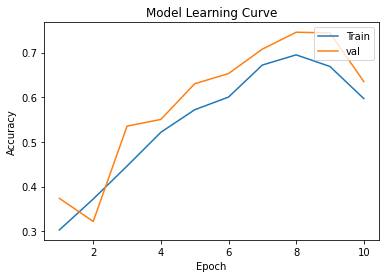

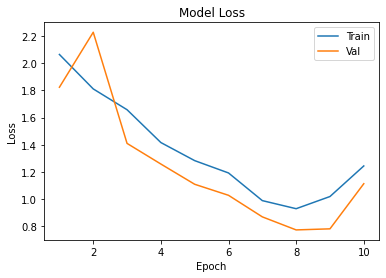

In [58]:
learning_curve(LSTM_history, 10)

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

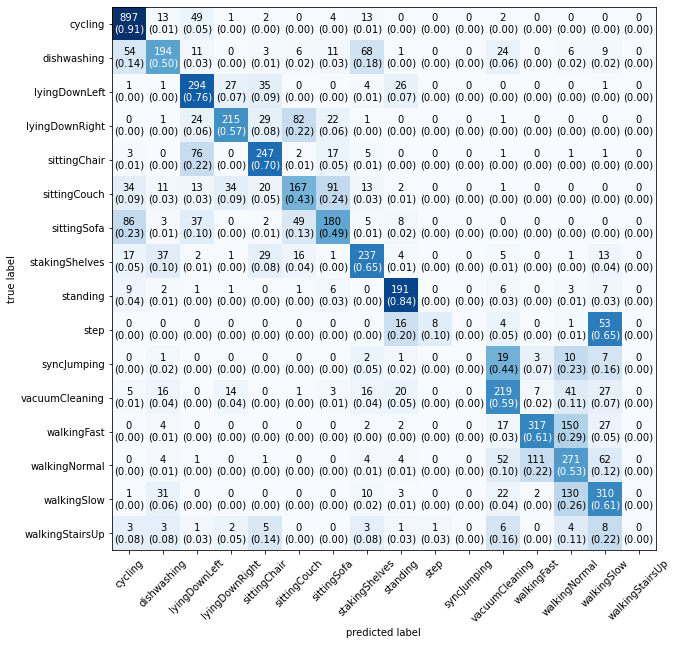

In [59]:
mat_LSTM = confusion_matrix(y_test_LSTM, y_pred_LSTM)
plot_confusion_matrix(conf_mat=mat_LSTM, class_names=label.classes_, show_normed=True, figsize=(10,10))

## Save dataframe for use with Machine Learning (Once Only!)

In [60]:
df

,x,y,z,labels,label
6985,-0.1969,0.9021,-0.4356,syncJumping,10
6986,-0.2046,0.9060,-0.4317,syncJumping,10
6987,-0.2008,0.9021,-0.4317,syncJumping,10
6988,-0.1969,0.8982,-0.4356,syncJumping,10
6989,-0.1969,0.9060,-0.4278,syncJumping,10
...,...,...,...,...,...
512054,-0.3743,0.9293,-0.1502,cycling,0
512055,-0.3743,0.9409,-0.1541,cycling,0
512056,-0.3743,0.9254,-0.1346,cycling,0
512057,-0.3627,0.9176,-0.1267,cycling,0


In [61]:
#df.to_csv("movement_data.csv", index=False)

# ConvLSTM Attempt

In [62]:
X_train.shape, X_test.shape

((23599, 240, 3), (5900, 240, 3))

In [63]:
X_train = X_train.reshape(23599, 3, 240, 1)
X_test = X_test.reshape(5900, 3, 240, 1)

In [64]:
X_train[0].shape, X_test[0].shape

((3, 240, 1), (3, 240, 1))

In [65]:
from tensorflow.keras.layers import Permute, Reshape

ConvLSTM = Sequential()

ConvLSTM.add(Conv2D(64, (1,5), activation='relu', input_shape=(3, 240,1), padding='same'))
ConvLSTM.add(MaxPooling2D(pool_size=(1,2)))
ConvLSTM.add(Dropout(0.5))
ConvLSTM.add(Conv2D(64, (1,5), activation='relu', padding='same'))
ConvLSTM.add(MaxPooling2D(pool_size=(1, 2)))
ConvLSTM.add(Dropout(0.5))
ConvLSTM.add(Permute((2, 1, 3)))
ConvLSTM.add(Reshape((-1, 3*64)))
ConvLSTM.add(LSTM(64, return_sequences=False))
ConvLSTM.add(Dropout(0.5))
ConvLSTM.add(Dense(16, activation='softmax'))

ConvLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 3, 240, 64)        384       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 120, 64)       0         
 )                                                               
                                                                 
 dropout_5 (Dropout)         (None, 3, 120, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 120, 64)        20544     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 60, 64)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 3, 60, 64)        

In [66]:
ConvLSTM.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', 
                  metrics=[f1, 'accuracy'])

In [67]:
ConvLSTM_history = ConvLSTM.fit(X_train, Y_train, epochs = 10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
738/738 [==============================] - 24s 31ms/step - loss: 1.3260 - f1: 4.5663 - accuracy: 0.5466 - val_loss: 0.9172 - val_f1: 3.1948 - val_accuracy: 0.7041
Epoch 2/10
738/738 [==============================] - 23s 31ms/step - loss: 0.8262 - f1: 2.6440 - accuracy: 0.7178 - val_loss: 0.7272 - val_f1: 2.1615 - val_accuracy: 0.7393
Epoch 3/10
738/738 [==============================] - 23s 31ms/step - loss: 0.6367 - f1: 2.0810 - accuracy: 0.7893 - val_loss: 0.5036 - val_f1: 1.7069 - val_accuracy: 0.8236
Epoch 4/10
738/738 [==============================] - 23s 31ms/step - loss: 0.5760 - f1: 1.8825 - accuracy: 0.8080 - val_loss: 0.6974 - val_f1: 1.6899 - val_accuracy: 0.7507
Epoch 5/10
738/738 [==============================] - 23s 31ms/step - loss: 0.5129 - f1: 1.7367 - accuracy: 0.8338 - val_loss: 0.4237 - val_f1: 1.6003 - val_accuracy: 0.8551
Epoch 6/10
738/738 [==============================] - 23s 32ms/step - loss: 0.4793 - f1: 1.6765 - accuracy: 0.8452 - val_loss: 0.4

In [68]:
time2 = time()
y_pred_ConvLSTM = np.argmax(ConvLSTM.predict(X_test), axis=1)
y_test_ConvLSTM = Y_test.copy()
mean_f1 = f1_score(y_test_ConvLSTM, y_pred_ConvLSTM, average='macro')
weighted_f1 = f1_score(y_test_ConvLSTM, y_pred_ConvLSTM, average='weighted')
accuracy = accuracy_score(y_test_ConvLSTM, y_pred_ConvLSTM)

print('mean-f1: {:.2f}, weighted-f1: {:.2f}, accuracy: {:.2f}, time: {:.3f} secs'.format(mean_f1, weighted_f1, accuracy,
                                                                                        time()-time2))

mean-f1: 0.84, weighted-f1: 0.89, accuracy: 0.89, time: 1.484 secs


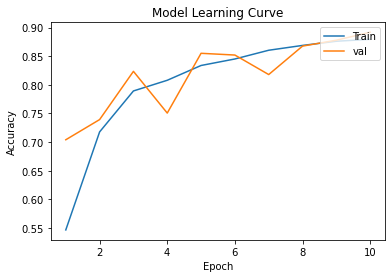

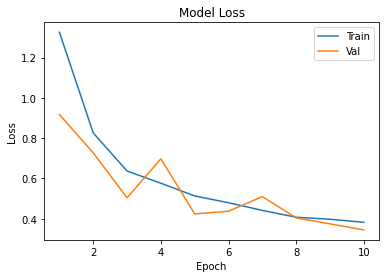

In [69]:
learning_curve(ConvLSTM_history, 10)

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

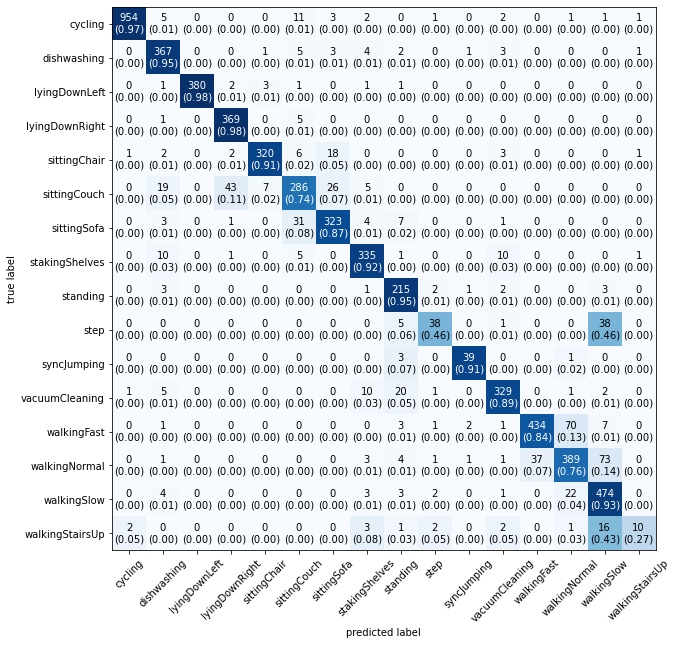

In [70]:
mat_ConvLSTM = confusion_matrix(y_test_ConvLSTM, y_pred_ConvLSTM)
plot_confusion_matrix(conf_mat=mat_ConvLSTM, class_names=label.classes_, show_normed=True, figsize=(10,10))